In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from yahoofinancials import YahooFinancials
import bs4 as bs
import urllib.request

In [5]:
aapl_df = yf.download('AAPL', 
                      start='2019-01-01', 
                      end='2021-06-12', 
                      progress=False,
)
aapl_df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-01-02,38.722500,39.712502,38.557499,39.480000,38.277531,148158800
2019-01-03,35.994999,36.430000,35.500000,35.547501,34.464806,365248800
2019-01-04,36.132500,37.137501,35.950001,37.064999,35.936081,234428400
2019-01-07,37.174999,37.207500,36.474998,36.982498,35.856094,219111200
2019-01-08,37.389999,37.955002,37.130001,37.687500,36.539623,164101200


In [13]:
tech_stocks = ['AAPL', 'MSFT', 'INTC']
bank_stocks = ['WFC', 'BAC', 'C']
commodity_futures = ['GC=F', 'SI=F', 'CL=F']
cryptocurrencies = ['BTC-USD', 'ETH-USD', 'XRP-USD']
currencies = ['EURUSD=X', 'JPY=X', 'GBPUSD=X']
mutual_funds = ['PRLAX', 'QASGX', 'HISFX']
us_treasuries = ['^TNX', '^IRX', '^TYX']

yahoo_financials_tech = YahooFinancials(tech_stocks)
tech_cash_flow_data_an = yahoo_financials_tech.get_financial_stmts('annual', 'cash')

In [12]:
yahoo_financials = YahooFinancials('AAPL')
print(yahoo_financials.get_key_statistics_data())

{'AAPL': {'annualHoldingsTurnover': None, 'enterpriseToRevenue': 7.027, 'beta3Year': None, 'profitMargins': 0.26579002, 'enterpriseToEbitda': 20.735, '52WeekChange': 0.30975795, 'morningStarRiskRating': None, 'forwardEps': 6.56, 'revenueQuarterlyGrowth': None, 'sharesOutstanding': 16319399936, 'fundInceptionDate': '-', 'annualReportExpenseRatio': None, 'totalAssets': None, 'bookValue': 4.402, 'sharesShort': 108944701, 'sharesPercentSharesOut': 0.0067000003, 'fundFamily': None, 'lastFiscalYearEnd': 1632528000, 'heldPercentInstitutions': 0.59576, 'netIncomeToCommon': 100554997760, 'trailingEps': 6.015, 'lastDividendValue': 0.22, 'SandP52WeekChange': 0.080180764, 'priceToBook': 35.307816, 'heldPercentInsiders': 0.0007, 'nextFiscalYearEnd': 1695600000, 'yield': None, 'mostRecentQuarter': 1640390400, 'shortRatio': 1.08, 'sharesShortPreviousMonthDate': '2022-01-14', 'floatShares': 16302795170, 'beta': 1.185531, 'enterpriseValue': 2658571911168, 'priceHint': 2, 'threeYearAverageReturn': None,

In [19]:
tech_stock_price_data = yahoo_financials_tech.get_stock_price_data()
tech_df = pd.DataFrame(tech_stock_price_data)
tech_df

,AAPL,MSFT,INTC
quoteSourceName,Nasdaq Real Time Price,Nasdaq Real Time Price,Nasdaq Real Time Price
regularMarketOpen,158.93,287.96,47.15
averageDailyVolume3Month,97572501,37671596,38841101
exchange,NMS,NMS,NMS
regularMarketTime,2022-03-11 20:12:37 UTC+0000,2022-03-11 20:12:43 UTC+0000,2022-03-11 20:12:52 UTC+0000
volume24Hr,None,None,None
regularMarketDayHigh,159.2799,288.9189,47.275
shortName,Apple Inc.,Microsoft Corporation,Intel Corporation
averageDailyVolume10Day,93466040,34701990,41781920
longName,Apple Inc.,Microsoft Corporation,Intel Corporation


In [21]:
tech_df.index

Index(['quoteSourceName', 'regularMarketOpen', 'averageDailyVolume3Month',
       'exchange', 'regularMarketTime', 'volume24Hr', 'regularMarketDayHigh',
       'shortName', 'averageDailyVolume10Day', 'longName',
       'regularMarketChange', 'currencySymbol', 'regularMarketPreviousClose',
       'preMarketPrice', 'preMarketTime', 'exchangeDataDelayedBy',
       'toCurrency', 'postMarketChange', 'postMarketPrice', 'exchangeName',
       'preMarketChange', 'circulatingSupply', 'regularMarketDayLow',
       'priceHint', 'currency', 'regularMarketPrice', 'regularMarketVolume',
       'lastMarket', 'regularMarketSource', 'openInterest', 'marketState',
       'underlyingSymbol', 'marketCap', 'quoteType', 'preMarketChangePercent',
       'volumeAllCurrencies', 'strikePrice', 'symbol', 'preMarketSource',
       'maxAge', 'fromCurrency', 'regularMarketChangePercent'],
      dtype='object')

In [22]:
tech_df.reset_index()

,index,AAPL,MSFT,INTC
0,quoteSourceName,Nasdaq Real Time Price,Nasdaq Real Time Price,Nasdaq Real Time Price
1,regularMarketOpen,158.93,287.96,47.15
2,averageDailyVolume3Month,97572501,37671596,38841101
3,exchange,NMS,NMS,NMS
4,regularMarketTime,2022-03-11 20:12:37 UTC+0000,2022-03-11 20:12:43 UTC+0000,2022-03-11 20:12:52 UTC+0000
5,volume24Hr,None,None,None
6,regularMarketDayHigh,159.2799,288.9189,47.275
7,shortName,Apple Inc.,Microsoft Corporation,Intel Corporation
8,averageDailyVolume10Day,93466040,34701990,41781920
9,longName,Apple Inc.,Microsoft Corporation,Intel Corporation


In [27]:
historical_stock_prices = yahoo_financials_tech.get_historical_price_data('2008-09-15', '2018-09-15', 'weekly')
tech_prices = pd.DataFrame(historical_stock_prices)
tech_prices

AAPL  \
eventsData      {'dividends': {'2012-08-06': {'amount': 0.0946...   
firstTradeDate  {'formatted_date': '1980-12-12', 'date': 34547...   
currency                                                      USD   
instrumentType                                             EQUITY   
timeZone                                    {'gmtOffset': -18000}   
prices          [{'date': 1221451200, 'high': 5.27464294433593...   

                                                             MSFT  \
eventsData      {'dividends': {'2008-11-17': {'amount': 0.13, ...   
firstTradeDate  {'formatted_date': '1986-03-13', 'date': 51110...   
currency                                                      USD   
instrumentType                                             EQUITY   
timeZone                                    {'gmtOffset': -18000}   
prices          [{'date': 1221451200, 'high': 27.4899997711181...   

                                                             INTC  
eventsData      {'dividends': {'2008-11-03': {'amount': 0.14, ...  
firstTradeDate  {'formatted_date': '1980-03-17', 'date': 32215...  
currency                                                      USD  
instrumentType                                             EQUITY  
timeZone                                    {'gmtOffset': -18000}  
prices          [{'date': 1221451200, 'high': 20.2199993133544...

In [29]:
tech_stocks = ['AAPL', 'MSFT', 'INTC']
yahoo_financials_tech = YahooFinancials(tech_stocks)
tech_stock_price_data = yahoo_financials_tech.get_stock_price_data()
tech_stock_price_data

{'AAPL': {'quoteSourceName': 'Nasdaq Real Time Price',
  'regularMarketOpen': 158.93,
  'averageDailyVolume3Month': 97572501,
  'exchange': 'NMS',
  'regularMarketTime': '2022-03-11 20:24:49 UTC+0000',
  'volume24Hr': None,
  'regularMarketDayHigh': 159.2799,
  'shortName': 'Apple Inc.',
  'averageDailyVolume10Day': 93466040,
  'longName': 'Apple Inc.',
  'regularMarketChange': -3.1699982,
  'currencySymbol': '$',
  'regularMarketPreviousClose': 158.52,
  'preMarketPrice': 158.96,
  'preMarketTime': '2022-03-11 14:29:59 UTC+0000',
  'exchangeDataDelayedBy': 0,
  'toCurrency': None,
  'postMarketChange': None,
  'postMarketPrice': None,
  'exchangeName': 'NasdaqGS',
  'preMarketChange': 0.440002,
  'circulatingSupply': None,
  'regularMarketDayLow': 154.7475,
  'priceHint': 2,
  'currency': 'USD',
  'regularMarketPrice': 155.35,
  'regularMarketVolume': 73517493,
  'lastMarket': None,
  'regularMarketSource': 'FREE_REALTIME',
  'openInterest': None,
  'marketState': 'REGULAR',
  'underl

In [14]:
import requests
headers={"user-agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/92.0.4515.107 Safari/537.36"}
res=requests.get("https://api.nasdaq.com/api/quote/list-type/nasdaq100",headers=headers)
main_data=res.json()['data']['data']['rows']


for i in range(len(main_data)):
    print(main_data[i]['symbol'])
    print(main_data[i]['companyName'])
    
    

ATVI
Activision Blizzard, Inc. Common Stock
ADBE
Adobe Inc. Common Stock
AMD
Advanced Micro Devices, Inc. Common Stock
ABNB
Airbnb, Inc. Class A Common Stock
ALGN
Align Technology, Inc. Common Stock
GOOG
Alphabet Inc. Class C Capital Stock
GOOGL
Alphabet Inc. Class A Common Stock
AMZN
Amazon.com, Inc. Common Stock
AEP
American Electric Power Company, Inc. Common Stock
AMGN
Amgen Inc. Common Stock
ADI
Analog Devices, Inc. Common Stock
ANSS
ANSYS, Inc. Common Stock
AAPL
Apple Inc. Common Stock
AMAT
Applied Materials, Inc. Common Stock
ASML
ASML Holding N.V. New York Registry Shares
AZN
AstraZeneca PLC American Depositary Shares
TEAM
Atlassian Corporation Plc Class A Ordinary Shares
ADSK
Autodesk, Inc. Common Stock
ADP
Automatic Data Processing, Inc. Common Stock
BIDU
Baidu, Inc. ADS
BIIB
Biogen Inc. Common Stock
BKNG
Booking Holdings Inc. Common Stock
AVGO
Broadcom Inc. Common Stock
CDNS
Cadence Design Systems, Inc. Common Stock
CHTR
Charter Communications, Inc. Class A Common Stock New


In [ ]:
d = []
for i in range(len(main_data)):
    d.append(
    {
        ''
    })
    

In [32]:
df_raw = pd.DataFrame(main_data)
df_raw.head()

,symbol,companyName,marketCap,lastSalePrice,netChange,percentageChange,deltaIndicator
0,ATVI,"Activision Blizzard, Inc. Common Stock","62,580,353,855",$80.31,-0.49,-0.61%,down
1,ADBE,Adobe Inc. Common Stock,"196,677,396,541",$416.38,-22.57,-5.14%,down
2,AMD,"Advanced Micro Devices, Inc. Common Stock","169,717,893,243",$104.29,-2.17,-2.04%,down
3,ABNB,"Airbnb, Inc. Class A Common Stock","86,561,351,876",$145.14,-6.66,-4.39%,down
4,ALGN,"Align Technology, Inc. Common Stock","31,570,990,581",$400.67,-29.42,-6.84%,down


In [28]:
df_raw.dtypes

symbol              object
companyName         object
marketCap           object
lastSalePrice       object
netChange           object
percentageChange    object
deltaIndicator      object
dtype: object

In [38]:

#df_raw['marketCap'] = pd.to_numeric(df_raw['marketCap'])


df_raw['percentageChange'] = [x.replace('%', '') for x in df_raw['percentageChange']]
df_raw['percentageChange'] = pd.to_numeric(df_raw['percentageChange'])



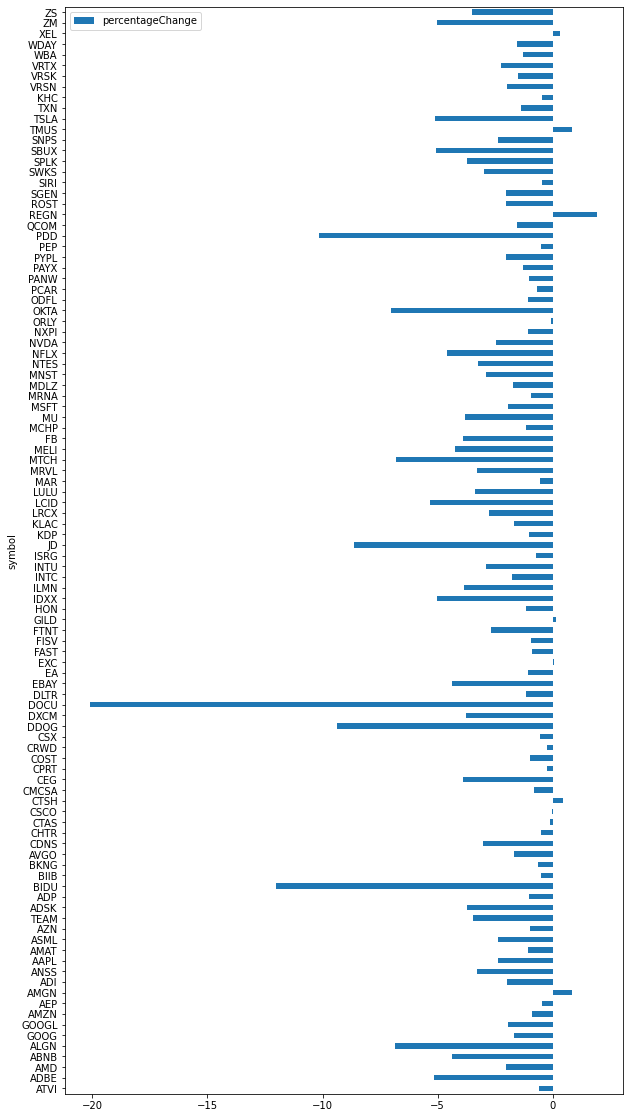

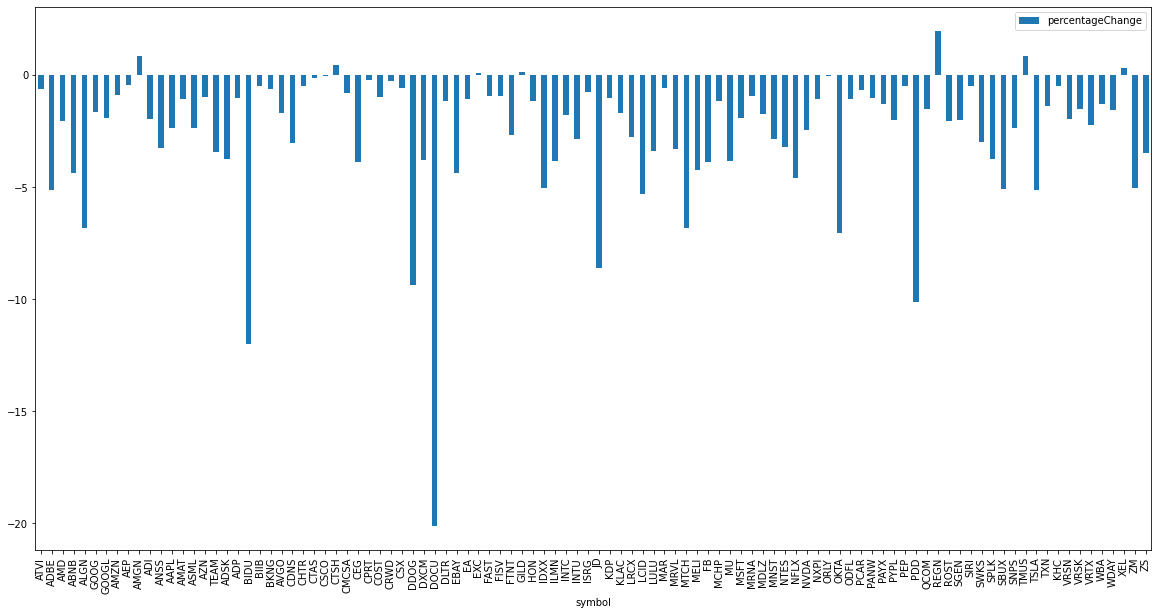

In [53]:
# plot

df_raw.plot(x ='symbol', y='percentageChange', kind='barh', figsize=(10,20))
df_raw.plot(x ='symbol', y='percentageChange', kind='bar', figsize=(20,10))
#df_raw.plot(x ='symbol', y='percentageChange', kind='scatter', figsize=(10,20))

plt.show()

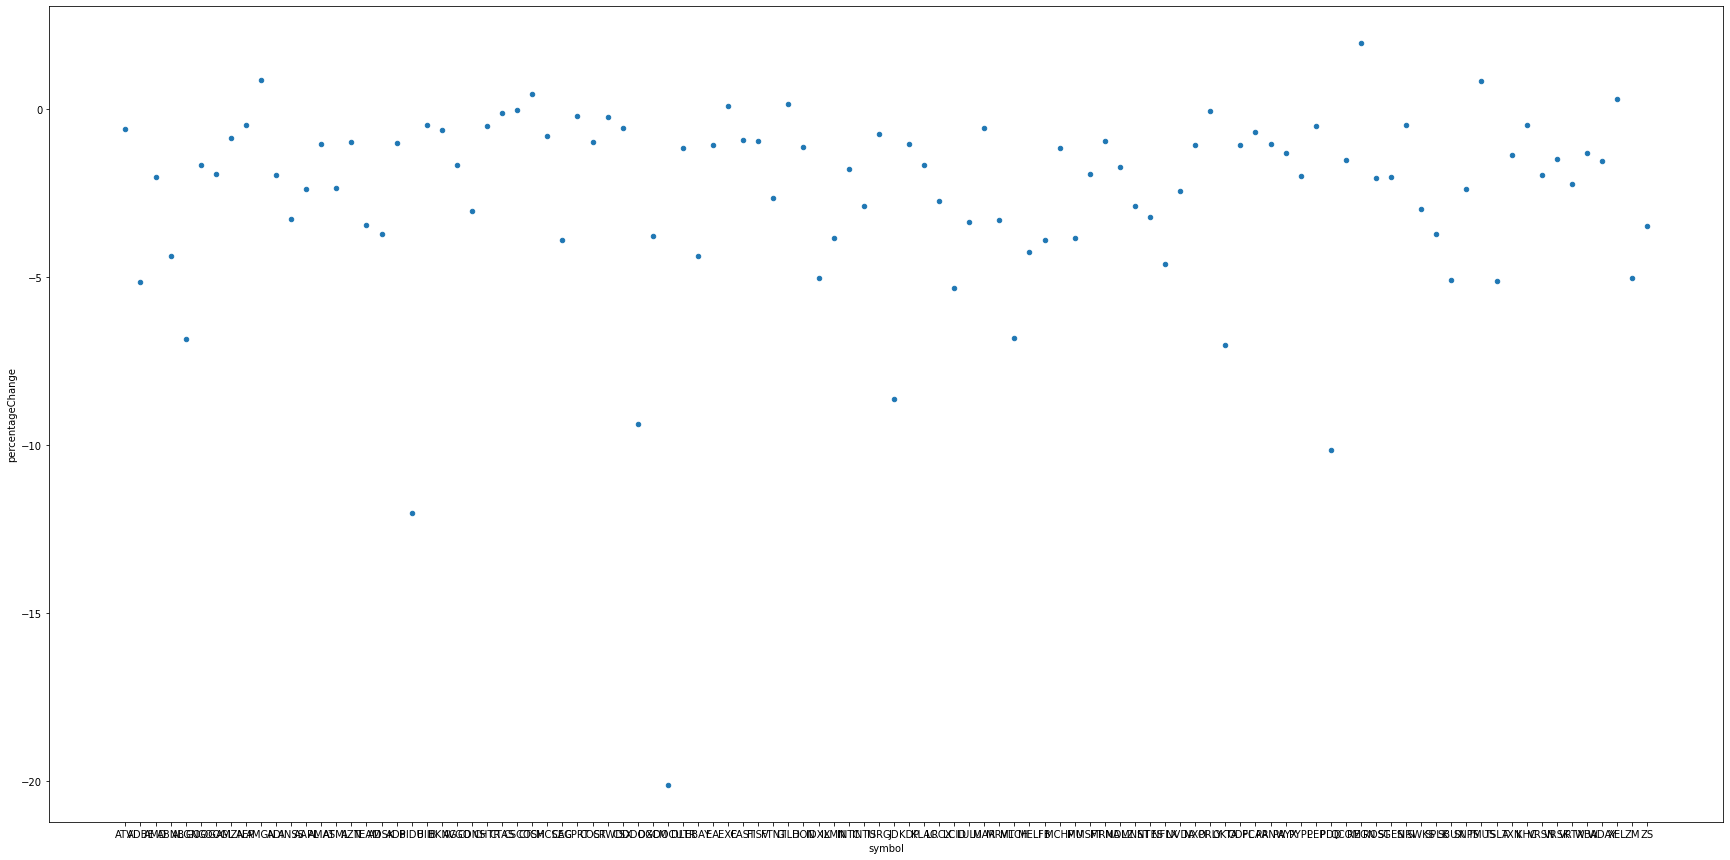

In [58]:
df_raw.plot(x ='symbol', y='percentageChange', kind='scatter', figsize=(30,15))

plt.show()

In [59]:
df_raw.head()

,symbol,companyName,marketCap,lastSalePrice,netChange,percentageChange,deltaIndicator
0,ATVI,"Activision Blizzard, Inc. Common Stock","62,580,353,855",$80.31,-0.49,-0.61,down
1,ADBE,Adobe Inc. Common Stock,"196,677,396,541",$416.38,-22.57,-5.14,down
2,AMD,"Advanced Micro Devices, Inc. Common Stock","169,717,893,243",$104.29,-2.17,-2.04,down
3,ABNB,"Airbnb, Inc. Class A Common Stock","86,561,351,876",$145.14,-6.66,-4.39,down
4,ALGN,"Align Technology, Inc. Common Stock","31,570,990,581",$400.67,-29.42,-6.84,down


In [60]:
symbol = 'FB'
ticker = yf.Ticker(symbol)

In [64]:
pd.Series(ticker.info).to_frame()

,0
zip,94025
sector,Communication Services
fullTimeEmployees,71970
longBusinessSummary,"Meta Platforms, Inc. develops products that enable people to connect and share with friends and family through mobile devices, personal computers, virtual reality headsets, wearables, and in-home devices worldwide. It operates in two segments, Family of Apps and Reality Labs. The Family of Apps segment's products include Facebook, which enables people to share, discover, and connect with interests; Instagram, a community for sharing photos, videos, and private messages, as well as feed, stories, reels, video, live, and shops; Messenger, a messaging application for people to connect with friends, family, groups, and businesses across platforms and devices through chat, audio and video calls, and rooms; and WhatsApp, a messaging application that is used by people and businesses to communicate and transact privately. The Reality Labs segment provides augmented and virtual reality related products comprising virtual reality hardware, software, and content that help people feel connected, anytime, and anywhere. The company was formerly known as Facebook, Inc. and changed its name to Meta Platforms, Inc. in October 2021. Meta Platforms, Inc. was incorporated in 2004 and is headquartered in Menlo Park, California."
city,Menlo Park
phone,650 543 4800
state,CA
country,United States
companyOfficers,[]
website,https://investor.fb.com


## Get Market data

In [66]:
data = ticker.history(period='5d',
                      interval='1m',
                      start=None,
                      end=None,
                      actions=True,
                      auto_adjust=True,
                      back_adjust=False)
data.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Datetime,,,,,,,
2022-03-07 09:30:00-05:00,200.789993,200.889999,199.919998,200.460007,992819,0,0
2022-03-07 09:31:00-05:00,200.460007,200.520004,200.180099,200.240005,117036,0,0
2022-03-07 09:32:00-05:00,200.225006,200.389999,199.413803,199.610001,106557,0,0
2022-03-07 09:33:00-05:00,199.156693,199.169998,198.911102,199.059998,92952,0,0
2022-03-07 09:34:00-05:00,199.339996,199.470001,199.130005,199.335007,86064,0,0


In [68]:
ticker.financials.head()

,2021-12-31 00:00:00,2020-12-31 00:00:00,2019-12-31 00:00:00,2018-12-31 00:00:00
Research Development,24655000000.0,18447000000.0,13600000000.0,10273000000.0
Effect Of Accounting Charges,None,None,None,None
Income Before Tax,47284000000.0,33180000000.0,24812000000.0,25361000000.0
Minority Interest,None,None,None,None
Net Income,39370000000.0,29146000000.0,18485000000.0,22112000000.0


In [69]:
ticker.quarterly_financials.head()

,2021-12-31 00:00:00,2021-09-30 00:00:00,2021-06-30 00:00:00,2021-03-31 00:00:00
Research Development,7046000000.0,6316000000.0,6096000000.0,5197000000.0
Effect Of Accounting Charges,None,None,None,None
Income Before Tax,12703000000.0,10565000000.0,12513000000.0,11503000000.0
Minority Interest,None,None,None,None
Net Income,10285000000.0,9194000000.0,10394000000.0,9497000000.0


In [70]:
ticker.earnings.head()

,Revenue,Earnings
Year,,
2018,55838000000,22112000000
2019,70697000000,18485000000
2020,85965000000,29146000000
2021,117929000000,39370000000


In [71]:
ticker.recommendations

,Firm,To Grade,From Grade,Action
Date,,,,
2012-06-22 07:56:00,Nomura,Buy,,init
2012-06-27 05:39:00,JP Morgan,Overweight,,init
2012-06-27 05:41:00,Bank of America,Neutral,,init
2012-06-27 05:44:00,Citigroup,Neutral,,init
2012-06-27 05:58:00,Credit Suisse,Neutral,,init
2012-06-27 06:41:00,Barclays,Equal-Weight,,init
2012-06-27 06:50:00,RBC Capital,Outperform,,init
2012-06-27 07:27:00,Raymond James,Market Perform,,init
2012-06-27 09:40:00,Cowen & Co.,Neutral,,init


In [74]:
sp_url = 'https://en.wikipedia.org/wiki/List_of_S%26P_500_companies'
sp = pd.read_html(sp_url, header=0)[0]
sp.head()
    

,Symbol,Security,SEC filings,GICS Sector,GICS Sub-Industry,Headquarters Location,Date first added,CIK,Founded
0,MMM,3M,reports,Industrials,Industrial Conglomerates,"Saint Paul, Minnesota",1976-08-09,66740,1902
1,AOS,A. O. Smith,reports,Industrials,Building Products,"Milwaukee, Wisconsin",2017-07-26,91142,1916
2,ABT,Abbott,reports,Health Care,Health Care Equipment,"North Chicago, Illinois",1964-03-31,1800,1888
3,ABBV,AbbVie,reports,Health Care,Pharmaceuticals,"North Chicago, Illinois",2012-12-31,1551152,2013 (1888)
4,ABMD,Abiomed,reports,Health Care,Health Care Equipment,"Danvers, Massachusetts",2018-05-31,815094,1981


In [77]:
import pandas_datareader.data as web
from datetime import datetime
start = '2014'              # accepts strings
end = datetime(2017, 5, 24) # or datetime objects
yahoo= web.DataReader('FB', 'yahoo', start=start, end=end)
yahoo.head()
    

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2014-01-02,55.220001,54.189999,54.830002,54.709999,43195500,54.709999
2014-01-03,55.650002,54.529999,55.020000,54.560001,38246200,54.560001
2014-01-06,57.259998,54.049999,54.419998,57.200001,68852600,57.200001
2014-01-07,58.549999,57.220001,57.700001,57.919998,77207400,57.919998
2014-01-08,58.410000,57.230000,57.599998,58.230000,56682400,58.230000


# new data set

In [80]:
stock_df = pd.read_csv('/Users/brendan/Desktop/Python/Mar 2022/us_equities_meta_data.csv')
stock_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6834 entries, 0 to 6833
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ticker     6834 non-null   object 
 1   name       6834 non-null   object 
 2   lastsale   6718 non-null   float64
 3   marketcap  5766 non-null   float64
 4   ipoyear    3038 non-null   float64
 5   sector     5288 non-null   object 
 6   industry   5288 non-null   object 
dtypes: float64(3), object(4)
memory usage: 373.9+ KB


In [91]:
sector =  stock_df['sector'].value_counts(normalize=True)*100
sector_count = stock_df['sector'].value_counts()
sector_df = pd.DataFrame(sector, sector_count)
sector.head()

(Finance              19.742814
 Health Care          16.055219
 Consumer Services    15.658094
 Technology           11.857035
 Capital Goods         6.996974
 Name: sector, dtype: float64,
 Finance              1044
 Health Care           849
 Consumer Services     828
 Technology            627
 Capital Goods         370
 Name: sector, dtype: int64)

In [94]:
stock_df.groupby('sector')['industry'].value_counts().to_frame()

industry
sector           industry                                                    
Basic Industries Precious Metals                                           87
                 Major Chemicals                                           71
                 Mining & Quarrying of Nonmetallic Minerals (No ...        21
                 Steel/Iron Ore                                            21
                 Agricultural Chemicals                                    13
...                                                                       ...
Transportation   Trucking Freight/Courier Services                         20
                 Oil Refining/Marketing                                    14
                 Railroads                                                 10
                 Transportation Services                                    5
                 Aerospace                                                  4

[209 rows x 1 columns]

In [86]:
stock_df['industry'].value_counts(normalize=True)*100

Major Pharmaceuticals                              8.434191
Major Banks                                        6.807867
Real Estate Investment Trusts                      4.614221
Business Services                                  4.538578
Oil & Gas Production                               3.403933
                                                     ...   
Diversified Electronic Products                    0.018911
Consumer: Greeting Cards                           0.018911
Electronics Distribution                           0.018911
Tools/Hardware                                     0.018911
General Bldg Contractors - Nonresidential Bldgs    0.018911
Name: industry, Length: 135, dtype: float64

In [96]:
stock_df.groupby('sector')['industry'].value_counts().loc[lambda x: x>30].to_frame()

industry
sector                industry                                                    
Basic Industries      Precious Metals                                           87
                      Major Chemicals                                           71
Capital Goods         Industrial Machinery/Components                           88
                      Auto Parts:O.E.M.                                         37
                      Metal Fabrications                                        36
Consumer Non-Durables Packaged Foods                                            41
                      Apparel                                                   31
                      Beverages (Production/Distribution)                       31
Consumer Services     Real Estate Investment Trusts                            244
                      Other Consumer Services                                   71
                      Restaurants                                               62
                      Other Specialty Stores                                    36
                      Clothing/Shoe/Accessory Stores                            34
                      Hotels/Resorts                                            34
Energy                Oil & Gas Production                                     175
                      Oilfield Services/Equipment                               32
Finance               Major Banks                                              360
                      Business Services                                        142
                      Property-Casualty Insurers                                95
                      Finance: Consumer Services                                74
                      Savings Institutions                                      69
                      Investment Bankers/Brokers/Service                        65
                      Commercial Banks                                          48
                      Real Estate                                               48
                      Investment Managers                                       46
                      Life Insurance                                            32
Health Care           Major Pharmaceuticals                                    446
                      Medical/Dental Instruments                               105
                      Biotechnology: Biological Products (No Diagnost...       100
                      Medical Specialities                                      34
                      Biotechnology: Electromedical & Electrotherapeu...        31
Miscellaneous         Business Services                                         98
Public Utilities      Telecommunications Equipment                              90
                      Electric Utilities: Central                               75
                      Natural Gas Distribution                                  43
Technology            Computer Software: Prepackaged Software                  151
                      EDP Services                                             121
                      Semiconductors                                           104
                      Industrial Machinery/Components                           43
                      Computer Software: Programming, Data Processing           42
                      Radio And Television Broadcasting And Communica...        36
Transportation        Marine Transportation                                     48